# **8.1** Environment action plans
---



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

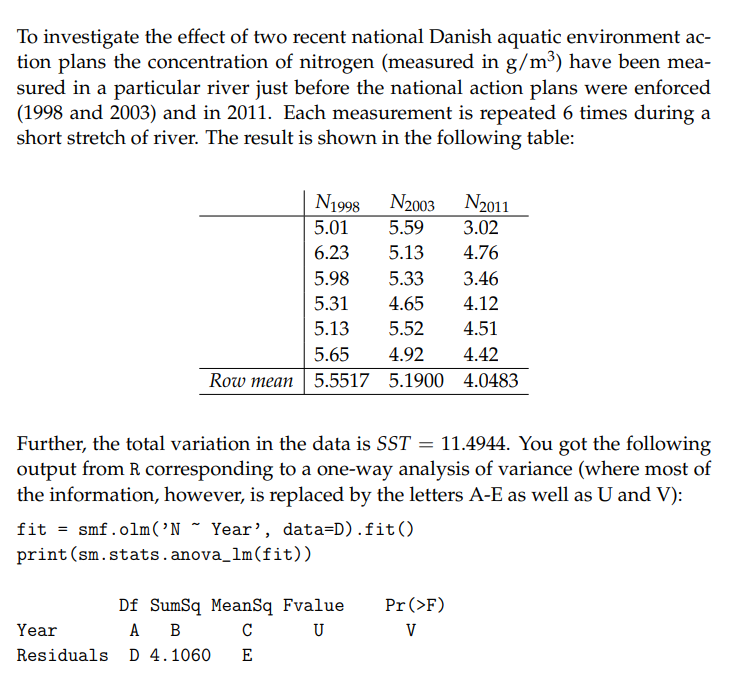

### **a)** What numbers did the letters A-D substitute?
---

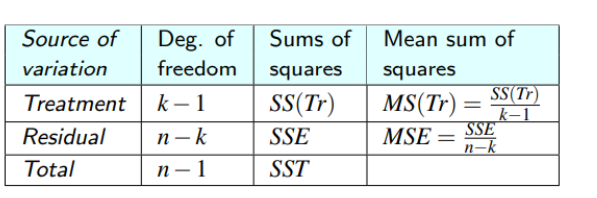

One should check the structure of the one-way ANOVA table, so **A and D are the**
**degrees of freedom, A = k - 1 = 3 - 1 = 2, and D = n - k = 18 - 3 = 15.** 

And B is the treatment sum-of-squares:

$SS(Tr) = SST − SSE = 11.4944 − 4.1060 = 7.3884$

And finally, C is the MS(Tr)-value

$MS(Tr) = SS(Tr)/2 = 7.3884/2 = 3.6942.$

### **b)** If you use the significance level α = 0.05, what critical value should be used for the hypothesis test carried out in the analysis (and in the table illustrated with the figures U and V)?

---

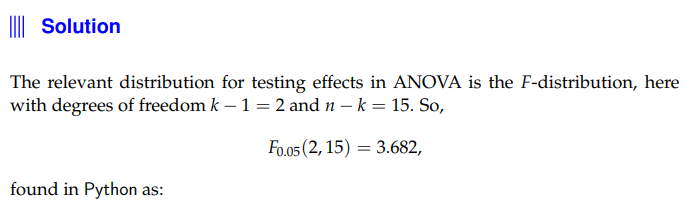

In [12]:
print(stats.f.ppf(0.95, 2, 15))

3.6823203436732412


### **c)** Can you with these data demonstrate statistically significant (at significance level α = 0.05) differences in N-mean values from year to year (both conclusion and argument must be valid)?
---


### Remeber that:
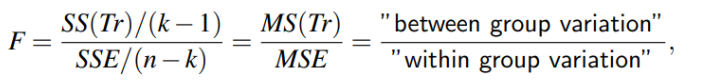

### so:

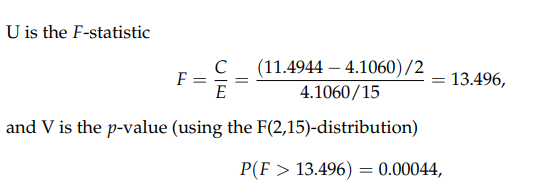

So, the answer is, yes, as the number V is less than 0.05:

In [13]:
print(1-stats.f.cdf(13.496, 2, 15))


0.00044354250479539115


### **d)** Compute the 90% confidence interval for the single mean difference between year 2011 and year 1998.
---

### Husk:
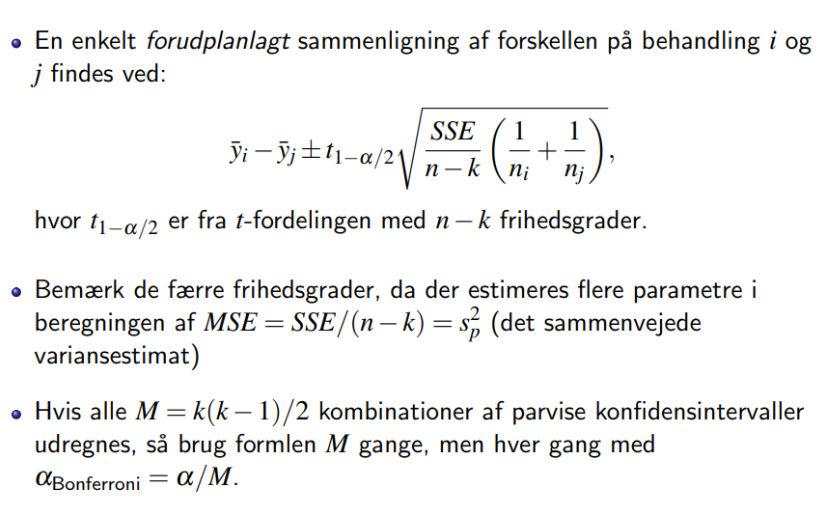

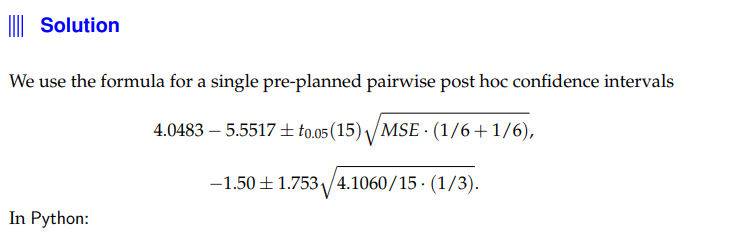

In [14]:
print(-1.5 + np.array([-1, 1]) * 1.753 * np.sqrt(4.1060 / 15 * (1/3)))


[-2.02952337 -0.97047663]


---

# **8.2** Environment action plans (part 2)
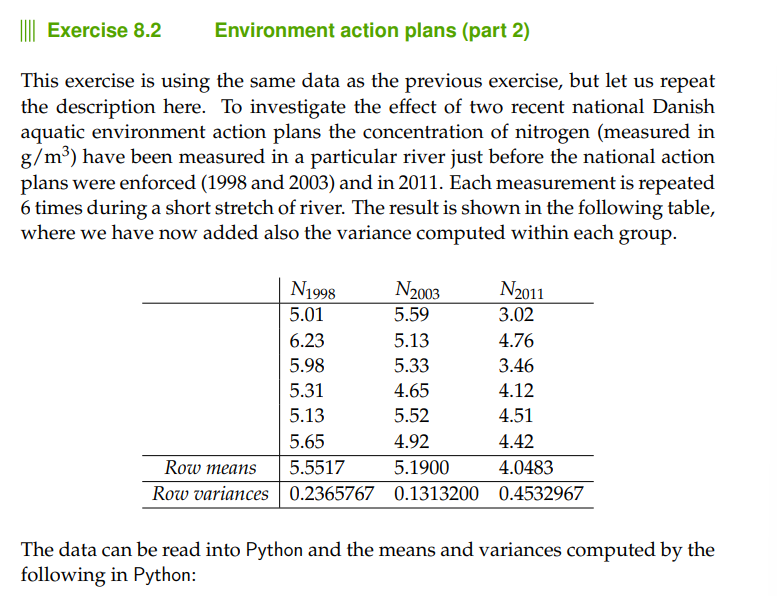

### The data can be read into Python and the means and variances computed by the
### following in Python:

In [16]:
nitrogen = np.array([
5.01, 5.59, 3.02,
6.23, 5.13, 4.76,
5.98, 5.33, 3.46,
5.31, 4.65, 4.12,
5.13, 5.52, 4.51,
5.65, 4.92, 4.42
])

year = pd.Categorical(np.tile(["1998", "2003", "2011"], 6))

df = pd.DataFrame({"nitrogen": nitrogen, "year": year})

print(df.groupby("year")["nitrogen"].mean())

print(df["nitrogen"].mean())


year
1998    5.551667
2003    5.190000
2011    4.048333
Name: nitrogen, dtype: float64
4.930000000000001


C:\Users\Visnu\AppData\Local\Temp\ipykernel_20284\2051718639.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("year")["nitrogen"].mean())


In [9]:
print(df.groupby("year")["nitrogen"].var())

year
1998    0.236577
2003    0.131320
2011    0.453297
Name: nitrogen, dtype: float64


C:\Users\Visnu\AppData\Local\Temp\ipykernel_20284\739164735.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("year")["nitrogen"].var())


In [10]:
print(df["nitrogen"].mean())


4.930000000000001


### **a)** Compute the three sums of squares (SST, SS(Tr) and SSE) using the three means and three variances, and the overall mean (show the formulas explicitly).
---


### Use the python command (or calulations, see solutios or notes for grouped_data_one_way_ANOVA):

In [17]:
# Make the ANOVA table:
fit = smf.ols("nitrogen ~ year", data=df).fit()
anova_table = sm.stats.anova_lm(fit)
print(anova_table)

            df    sum_sq   mean_sq          F    PR(>F)
year       2.0  7.388433  3.694217  13.495787  0.000444
Residual  15.0  4.105967  0.273731        NaN       NaN


In [19]:
# Compute the overall mean and add to dataframe:
df['overall_mean'] = df["nitrogen"].mean()
df

# calculate SST contribution of each datapoint:
df["sst_contribution"] = (df["nitrogen"] - df["overall_mean"])**2
df

SST = df["sst_contribution"].sum()
print(SST)



11.494400000000002


### **b)** Find the SST-value in Python using the sample variance function var.
---

### DONE

### **c)** Run the ANOVA in Python and produce the ANOVA table in Python.
---

### DONE

### **d)** Do a complete post hoc analysis, where all the 3 years are compared pairwise.
---


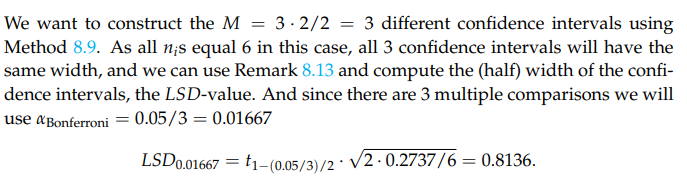

In [22]:
LSD_0_01667 = stats.t.ppf(1 - (0.05 / 3) / 2, 15) * np.sqrt(2*0.2737/6)
print(LSD_0_01667)


0.8136400856486218


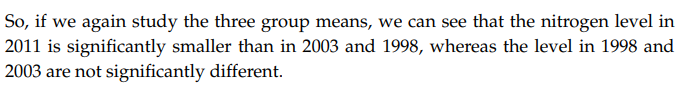

C:\Users\Visnu\AppData\Local\Temp\ipykernel_20284\3427666051.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plt.text(i+1, df.groupby('year')['nitrogen'].mean()[i],letter,fontsize=20, color='red')
C:\Users\Visnu\AppData\Local\Temp\ipykernel_20284\3427666051.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i+1, df.groupby('year')['nitrogen'].mean()[i],letter,fontsize=20, color='red')


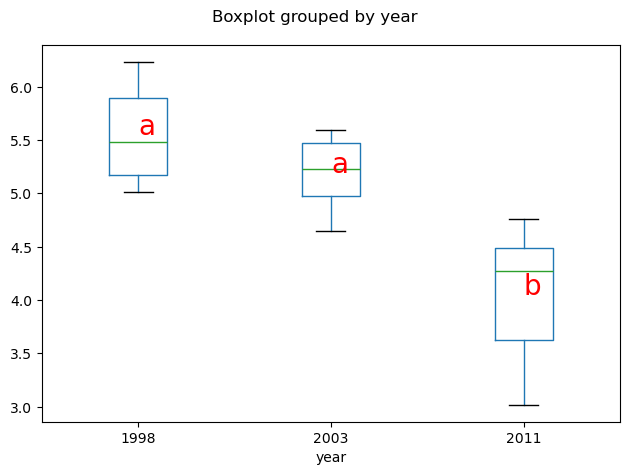

In [21]:
df.boxplot(column='nitrogen', by='year', grid=False)
plt.title("")
letters = ['a', 'a', 'b']



# Add text on top of each boxplot
for i, letter in enumerate(letters):
    plt.text(i+1, df.groupby('year')['nitrogen'].mean()[i],letter,fontsize=20, color='red')

plt.tight_layout()
plt.show()


### **e)** Use Python to do model validation by residual analysis.
---

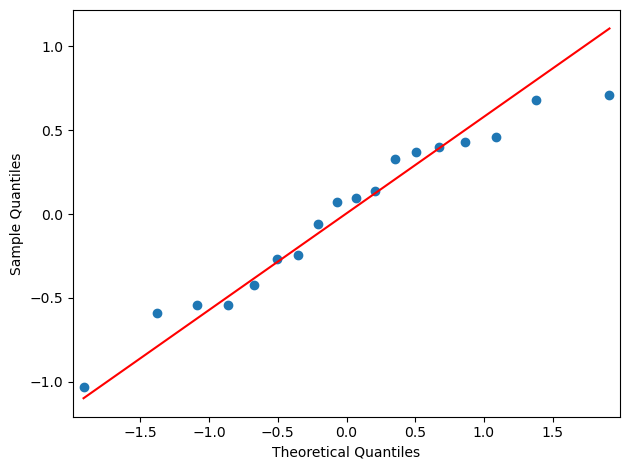

In [24]:
sm.qqplot(fit.resid, line='q',a=1/2)
plt.tight_layout()
plt.show()


---

# **8.3** Plastic film

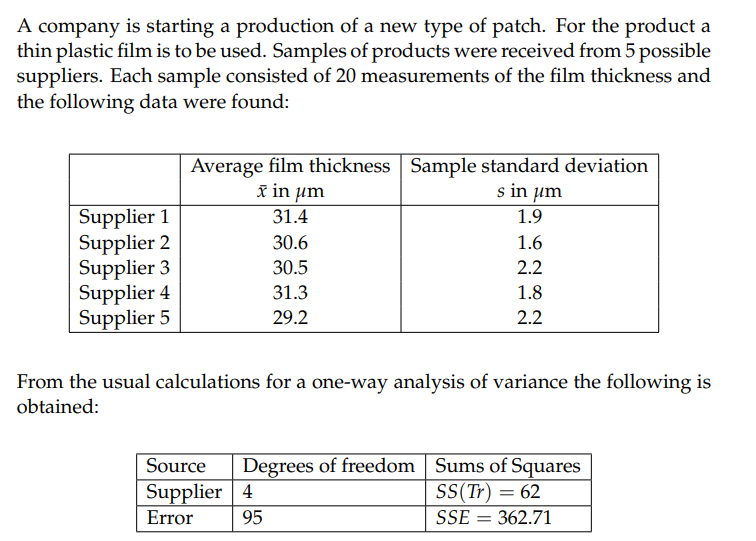


### **a)** Is there a significant (α = 5%) difference between the mean film thicknesses for the suppliers (both conclusion and argument must be correct)?


### Husk fobs = 
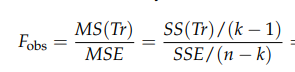

In [29]:
print((62/4)/(362.71/95))

stats.f.ppf(0.95, 4, 95)

4.059717129387114


2.4674936234496485

### So the answer is: Yes, the null hypothesis is rejected, since Fobs = 4.06 is larger than the critical value 2.47.

### or:

In [30]:
print(1 - stats.f.cdf(4.06, 4, 95))


0.004405521419133418


### and conclude that it is this is so small, we have strong evidence against the null hypothesis.

### **b)** Compute a 95% confidence interval for the difference in mean film thicknesses of Supplier 1 and Supplier 4 (considered as a “single pre-planned” comparison).

---

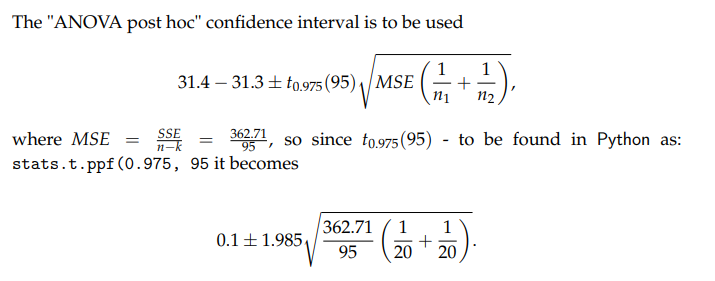

In [31]:
print(0.1+np.array([-1,1])*
stats.t.ppf(0.975, 95)*np.sqrt(362.71/(95*10)))


[-1.12668594  1.32668594]


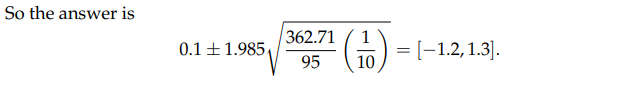

# **8.4** Brass alloys
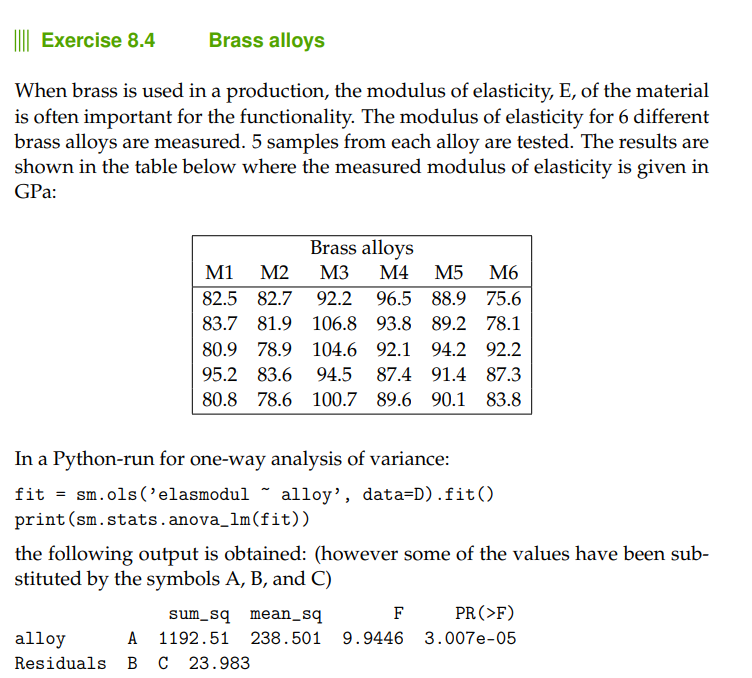

### **a)** What are the values of A, B, and C?
---

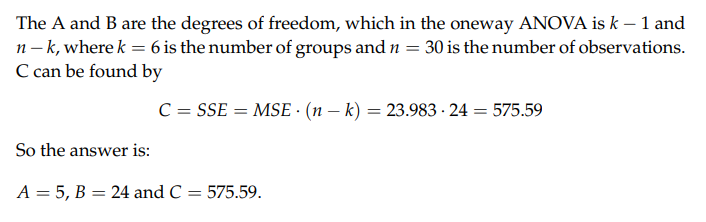

### **b)** The assumptions for using the one-way analysis of variance is (choose the answer that lists all the assumptions and that NOT lists any unnecessary assumptions):

* 1 ) The data must be normally and independently distributed within each group and the variances within each group should not differ significantly from each other

* 2 ) The data must be normally and independently distributed within each group

* 3 ) The data must be normally and independently distributed and have approximately the same mean and variance within each group

* 4 ) The data should not bee too large or too small
  
* 5 ) The data must be normally and independently distributed within each group and have approximately the same IQR-value in each group
  
---


### It is difficult to make a lot of arguments here, but simply emphasize that only in
### Answer 1 all assumptions needed, and no unnecessary assumptions, are listed.




### **c)** Compute a 95% confidence interval for the single pre-planned difference between brass alloy 1 and 2.
---

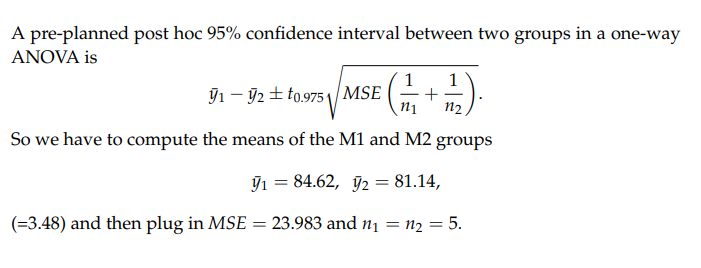

In [33]:
print(84.62 - 81.14 + np.array([-1,1])*
stats.t.ppf(0.975, 24)*np.sqrt(23.983*2/5))

[-2.9124906  9.8724906]
